# Imports

In [8]:
import pandas as pd

# Loading data

In [21]:
churn = pd.read_csv('../Dados/Churn.csv', sep=';')
churn.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Nomeia Colunas

In [27]:
churn.columns = ['Id','Score','Estado','Genero','Idade','Patrimonio',
                'Saldo','Produtos','Cartao Credito','Ativo','Salario','Saiu']
churn.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,Cartao Credito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Tamanho = linha, colunas

In [24]:
churn.shape

(999, 12)

# Agrupar por Tamanho

In [29]:
# TD e SP não era para está aqui
agrupado = churn.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

# Gráfico

<AxesSubplot:xlabel='Estado'>

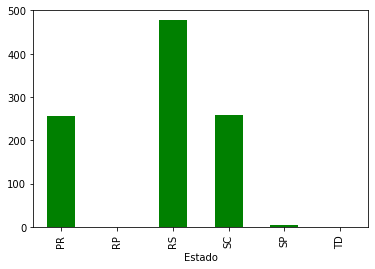

In [31]:
agrupado.plot.bar(color='green')

# Tratamento de dados

In [33]:
# Atribuir a MODA (Maior valor)
churn.loc[churn['Estado'].isin(['RP','SP','TD']), 'Estado'] = 'RS'
agrupado = churn.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    484
SC    258
dtype: int64

<AxesSubplot:xlabel='Estado'>

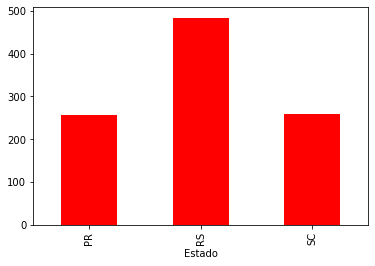

In [35]:
agrupado.plot.bar(color='red')

# Dados do Score

In [85]:
churn['Score'].describe()

count    998.000000
mean     648.605210
std       98.312117
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

In [40]:
# Importando gráfico
import seaborn as srn

C:\Users\Machine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Score')

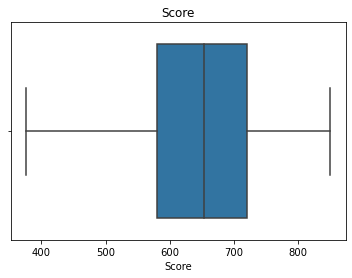

In [42]:
srn.boxplot(churn['Score']).set_title('Score')

# Tratar Gênero

In [47]:
agrupado = churn.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    529
dtype: int64

In [49]:
# Somando os NaN
churn['Genero'].isnull().sum()

0

In [54]:
# Preencher os NaN com Masculino, usando o Moda (maior valor)
churn['Genero'].fillna('Masculino', inplace=True)

In [86]:
# Gênero for igual 'M', se tornará Masculino
churn.loc[churn['Genero'] == 'M', 'Genero']= 'Masculino'
# Gênero for igual 'Fem' e 'F', se tornará Feminino
churn.loc[churn['Genero'].isin(['Fem','F']), 'Genero']= 'Feminino'

agrupado = churn.groupby(['Genero']).size()
agrupado

Genero
Feminino     463
Masculino    535
dtype: int64

# Tratar Idade

In [57]:
churn['Idade'].describe()
# Erros
# Idade mínima: -20 anos; Idade Máxima: 140 anos

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [60]:
# Filtrar valores menor 0 ou maior que 120
churn.loc[(churn['Idade'] < 0) | (churn['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,Cartao Credito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [61]:
import statistics as sts

In [63]:
# Calcular a mediana
mediana = sts.median(churn['Idade'])
mediana

37

In [66]:
# Substituir pelo valor da mediana, idades negativas e 140
churn.loc[(churn['Idade'] < 0) | (churn['Idade'] > 120), 'Idade'] = mediana

In [90]:
# Testando
churn.loc[(churn['Idade'] < 0) | (churn['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,Cartao Credito,Ativo,Salario,Saiu


In [91]:
churn['Idade'].describe()

count    998.000000
mean      38.908818
std       10.676642
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

C:\Users\Machine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

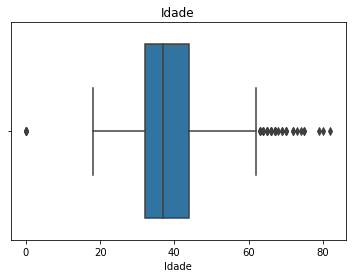

In [89]:
srn.boxplot(churn['Idade']).set_title('Idade')

# Tratando ID

In [70]:
# Procurando valores duplicados, não guarda
churn[churn.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,Cartao Credito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [72]:
# Excluir duplicado e manter o primeiro dado, salvar
churn.drop_duplicates(subset='Id', keep='first', inplace=True)
# Buscando duplicado
churn[churn.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,Cartao Credito,Ativo,Salario,Saiu


# Tratar Saldo

In [92]:
churn['Saldo'].describe()
# Tudo certo

count    9.980000e+02
mean     7.162423e+06
std      6.314508e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.926348e+06
75%      1.258767e+07
max      2.117743e+07
Name: Saldo, dtype: float64

C:\Users\Machine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Saldo')

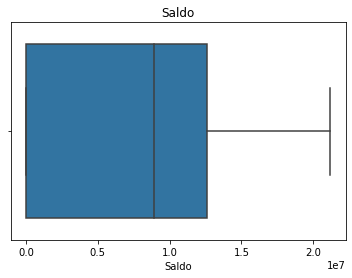

In [93]:
srn.boxplot(churn['Saldo']).set_title('Saldo')

# Tratar Salário

In [76]:
churn['Salario'].describe()

count    9.910000e+02
mean     3.530593e+07
std      5.308476e+08
min      9.677000e+03
25%      3.020010e+06
50%      8.695742e+06
75%      1.404604e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [78]:
# Calculando a mediana para substituição
mediana = sts.median(churn['Salario'])
mediana

73752.0

In [80]:
# Valores não preenchidos(vazio)
churn.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
Cartao Credito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [82]:
# Substituir os valores vazios pela mediana
churn['Salario'].fillna(mediana, inplace=True)

In [94]:
churn['Salario'].isnull().sum()

0

C:\Users\Machine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Salario')

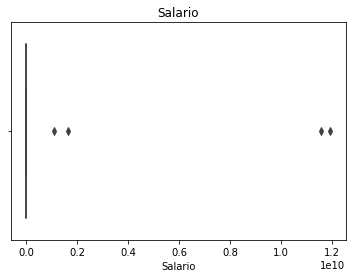

In [95]:
srn.boxplot(churn['Salario']).set_title('Salario')